In [1]:
import sympy as sym
from sympy import Matrix
from mitroiki_functs import K_without_axial
from mitroiki_functs import P_point_load_at_distance_a, P_uniformly_distributed_load
from mitroiki_functs import round_expr

import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

from IPython.display import Image

# Εφαρμογή 6

Να υπολογιστούν οι αντιδράσεις στήριξης, οι παραμορφώσεις και τα διαγράμματα των εντατικών μεγεθών για τον φορέα του σχήματος.

Να αγνοηθούν οι αξονικοί βαθμοί ελευθερίας
<!-- <img src="img\ekfonisi.png" width="650"> -->

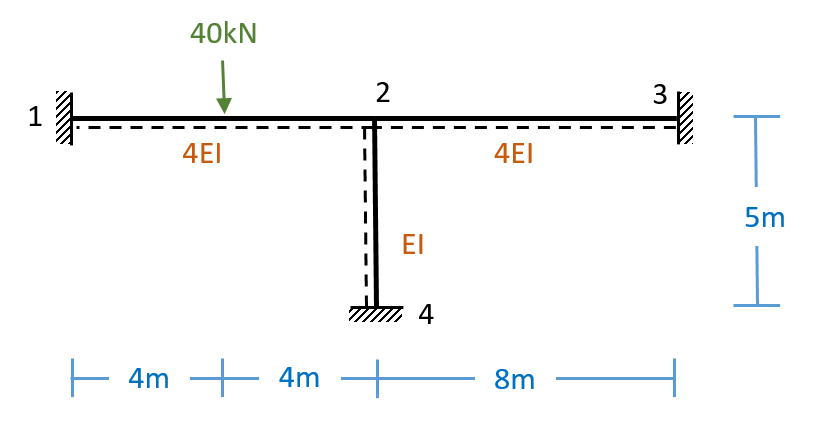

In [2]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example6/ekfonisi.png", width=650)

In [3]:
E = 10_000.
I = 1.
L1 = 8.0
L2 = 5.0

F_load = 40.

## Αντιστοίχιση τοπικών - καθολικών βαθμών ελευθερίας

| Καθολ. Συστ. | (1) | (2) | (3) | (4) | (5) | (6) | (7) | (8) | (9) |
|--------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 1-2          |     |  1  |  2  |  3  |  4  |     |     |     |     |
| 2-3          |     |     |     |  1  |  2  |  3  |  4  |     |     |
| 3-4          |  1  |     |     |     |  2  |     |     |  3  |  4  |

<!-- <img src="img\dof_global_local.png" width="650"> -->

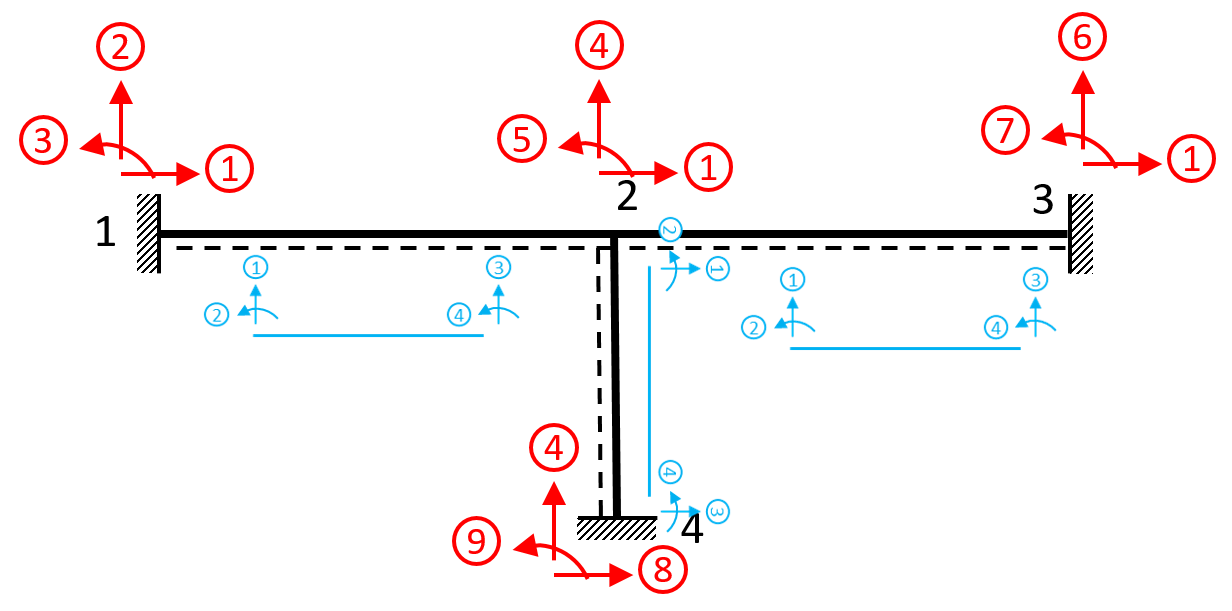

In [4]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example6/dof_global_local.png", width=650)

## Μητρώα στιβαρότητας στοιχείων
Τα στοιχεία 2 (2-3) και 3 (3-4) έχουν όμοια μητρώα στιβαρότητας (ίδιες διαστάσεις, διατομές, υλικά)

In [5]:
K1 = K2 = K_without_axial(E=E, I=4*I, L=L1)
round_expr(K1, 1)

Matrix([
[ 937.5,  3750.0,  -937.5,  3750.0],
[3750.0, 20000.0, -3750.0, 10000.0],
[-937.5, -3750.0,   937.5, -3750.0],
[3750.0, 10000.0, -3750.0, 20000.0]])

In [6]:
K3 = K_without_axial(E=E, I=I, L=L2)
round_expr(K3, 1)

Matrix([
[ 960.0,  2400.0,  -960.0,  2400.0],
[2400.0,  8000.0, -2400.0,  4000.0],
[-960.0, -2400.0,   960.0, -2400.0],
[2400.0,  4000.0, -2400.0,  8000.0]])

## Μητρώο στιβαρότητας φορέα
Είναι διαστάσεων 9x9 και δημιουργείται από το συνδυασμό των επιμέρους μητρώων, βάσει της αντιστοίχισης των βαθμών ελευθερίας στο καθολικό σύστημα συντεταγμένων

Δημιουργείται ένα μηδενικό μητρώο 9x9 και σταδιακά προστίθενται οι τιμές στις κατάλληλες θέσεις

| Καθολ. Συστ. | (1) | (2) | (3) | (4) | (5) | (6) | (7) | (8) | (9) |
|--------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 1-2          |     |  1  |  2  |  3  |  4  |     |     |     |     |
| 2-3          |     |     |     |  1  |  2  |  3  |  4  |     |     |
| 3-4          |  1  |     |     |     |  2  |     |     |  3  |  4  |

In [7]:
K1_temp = sym.zeros(9,9)

K1_temp[1:5, 1:5] += K1  
round_expr(K1_temp, 1)

Matrix([
[0,      0,       0,       0,       0, 0, 0, 0, 0],
[0,  937.5,  3750.0,  -937.5,  3750.0, 0, 0, 0, 0],
[0, 3750.0, 20000.0, -3750.0, 10000.0, 0, 0, 0, 0],
[0, -937.5, -3750.0,   937.5, -3750.0, 0, 0, 0, 0],
[0, 3750.0, 10000.0, -3750.0, 20000.0, 0, 0, 0, 0],
[0,      0,       0,       0,       0, 0, 0, 0, 0],
[0,      0,       0,       0,       0, 0, 0, 0, 0],
[0,      0,       0,       0,       0, 0, 0, 0, 0],
[0,      0,       0,       0,       0, 0, 0, 0, 0]])

In [8]:
K2_temp = sym.zeros(9,9)

K2_temp[3:7, 3:7] += K2

round_expr(K2_temp, 1)

Matrix([
[0, 0, 0,      0,       0,       0,       0, 0, 0],
[0, 0, 0,      0,       0,       0,       0, 0, 0],
[0, 0, 0,      0,       0,       0,       0, 0, 0],
[0, 0, 0,  937.5,  3750.0,  -937.5,  3750.0, 0, 0],
[0, 0, 0, 3750.0, 20000.0, -3750.0, 10000.0, 0, 0],
[0, 0, 0, -937.5, -3750.0,   937.5, -3750.0, 0, 0],
[0, 0, 0, 3750.0, 10000.0, -3750.0, 20000.0, 0, 0],
[0, 0, 0,      0,       0,       0,       0, 0, 0],
[0, 0, 0,      0,       0,       0,       0, 0, 0]])

In [9]:
K3_temp = sym.zeros(9,9)

K3_temp[0, 0] += K3[0, 0]
K3_temp[4, 0] += K3[1, 0]
K3_temp[7:, 0] += K3[2:, 0]

K3_temp[0, 4] += K3[0, 1]
K3_temp[4, 4] += K3[1, 1]
K3_temp[7:, 4] += K3[2:, 1]

K3_temp[0, 7:] += K3[0, 2:]
K3_temp[4, 7:] += K3[1, 2:]
K3_temp[7:, 7:] += K3[2:, 2:]

round_expr(K3_temp, 1)

Matrix([
[ 960.0, 0, 0, 0,  2400.0, 0, 0,  -960.0,  2400.0],
[     0, 0, 0, 0,       0, 0, 0,       0,       0],
[     0, 0, 0, 0,       0, 0, 0,       0,       0],
[     0, 0, 0, 0,       0, 0, 0,       0,       0],
[2400.0, 0, 0, 0,  8000.0, 0, 0, -2400.0,  4000.0],
[     0, 0, 0, 0,       0, 0, 0,       0,       0],
[     0, 0, 0, 0,       0, 0, 0,       0,       0],
[-960.0, 0, 0, 0, -2400.0, 0, 0,   960.0, -2400.0],
[2400.0, 0, 0, 0,  4000.0, 0, 0, -2400.0,  8000.0]])

Οπότε το συνολικό μητρώο του φορέα είναι το $Κ$

In [10]:
K = K1_temp + K2_temp + K3_temp
round_expr(K, 1)

Matrix([
[ 960.0,      0,       0,       0,  2400.0,       0,       0,  -960.0,  2400.0],
[     0,  937.5,  3750.0,  -937.5,  3750.0,       0,       0,       0,       0],
[     0, 3750.0, 20000.0, -3750.0, 10000.0,       0,       0,       0,       0],
[     0, -937.5, -3750.0,  1875.0,       0,  -937.5,  3750.0,       0,       0],
[2400.0, 3750.0, 10000.0,       0, 48000.0, -3750.0, 10000.0, -2400.0,  4000.0],
[     0,      0,       0,  -937.5, -3750.0,   937.5, -3750.0,       0,       0],
[     0,      0,       0,  3750.0, 10000.0, -3750.0, 20000.0,       0,       0],
[-960.0,      0,       0,       0, -2400.0,       0,       0,   960.0, -2400.0],
[2400.0,      0,       0,       0,  4000.0,       0,       0, -2400.0,  8000.0]])

## Μητρώο εξωτερικής φόρτισης

### Στοιχείο 1
Το στοιχείο 1 παραλαμβάνει σημειακό φορτίο $F=40\text{kN}$

In [11]:
P1 = P_point_load_at_distance_a(P=F_load, L=L1, a=L1/2)
round_expr(P1, 2)

Matrix([
[-20.0],
[-40.0],
[-20.0],
[ 40.0]])

### Συνολικό μητρώο εξωτερικής φόρτισης

Για να προκύψει το συνολικό μητρώο $P$ λαμβάνεται υπόψη η συσχέτιση των τοπικών με τους καθολικούς βαθμούς ελευθερίας

| Καθολ. Συστ. | (1) | (2) | (3) | (4) | (5) | (6) | (7) | (8) | (9) |
|--------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 1-2          |     |  1  |  2  |  3  |  4  |     |     |     |     |
| 2-3          |     |     |     |  1  |  2  |  3  |  4  |     |     |
| 3-4          |  1  |     |     |     |  2  |     |     |  3  |  4  |

Δημιουργείται ένα μητρώο 9x1 και στη συνέχεια προστίθενται οι τιμές στις κατάλληλες θέσεις

Με δεδομένο ότι η εξωτερική φόρτιση υπάρχει σε ένα στοιχείο, το διάνυσμα που θα προκύψει από τη φόρτιση του στοιχείου 1 θα είναι και το τελικό για το σύνολο του φορέα. 

In [12]:
P = sym.zeros(9,1)
P [1:5, 0] += P1
round_expr(P, 2)

Matrix([
[    0],
[-20.0],
[-40.0],
[-20.0],
[ 40.0],
[    0],
[    0],
[    0],
[    0]])

## Δεσμευμένοι και ελεύθεροι βαθμοί ελευθερίας

Ο μοναδικός ελεύθερος βαθμός ελευθερίας είναι ο <span style="color:blue">(5)</span>, ενώ όλοι οι υπόλοιποι είναι δεσμευμένοι λόγω των τριών πακτώσεων στους κόμβους 1, 3 και 4 και της σύνδεσής των στοιχείων με τον κόμβο 2, αγνοώντας τους αξονικούς βαθμούς ελευθερίας.

## Διαχωρισμός μητρώων

| Καθολ. Συστ. | <span style="color:red">(1)</span> | <span style="color:red">(2)</span> | <span style="color:red">(3)</span> | <span style="color:red">(4)</span> | <span style="color:blue">(5)</span> | <span style="color:red">(6)</span> | <span style="color:red">(7)</span> | <span style="color:red">(8)</span> | <span style="color:red">(9)</span> |
|--------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 1-2          |     |  1  |  2  |  3  |  4  |     |     |     |     |
| 2-3          |     |     |     |  1  |  2  |  3  |  4  |     |     |
| 3-4          |  1  |     |     |     |  2  |     |     |  3  |  4  |

<!-- <img src="img\Kuu_vs_Kru.png" width="800"> -->

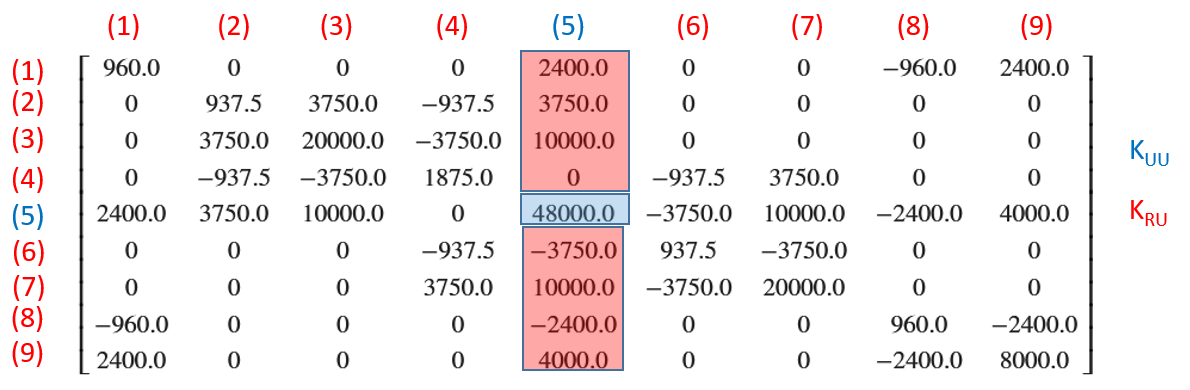

In [13]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example6/Kuu_vs_Kru.png", width=800)

Ομοίως και για τα μητρώα εξωτερικής φόρτισης, παραμορφώσεων και αντιδράσεων
<!-- <img src="img\PUR.png" width="750"> -->

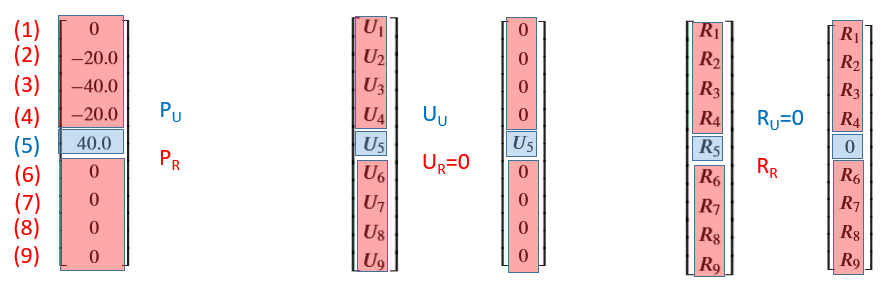

In [14]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example6/PUR.png", width=700)

### Υπομητρώα στιβαρότητας

In [15]:
K_UU = K[[4], [4]]
round_expr(K_UU, 1)

Matrix([[48000.0]])

Παρατηρείται ότι το μητρώο $K_{UU}$ στην περίπτωσή μας είναι απλά ένας αριθμος

In [16]:
K_RU = K[[0, 1, 2, 3, 5, 6, 7, 8], [4]]
round_expr(K_RU, 1)

Matrix([
[ 2400.0],
[ 3750.0],
[10000.0],
[      0],
[-3750.0],
[10000.0],
[-2400.0],
[ 4000.0]])

### Υπομητρώα εξωτερικής φόρτισης

In [17]:
P_U = P[[4], 0]
round_expr(P_U, 2)

Matrix([[40.0]])

Ομοίως με το μητρώο $K_{UU}$ και το $P_{U}$ στην περίπτωσή μας είναι απλά ένας αριθμος.

Οπότε η λύση για τον υπολογισμό του $U_5$ που επίσης είναι ένας αριθμός, είναι μια απλή διαίρεση

In [18]:
P_R = P[[0, 1, 2, 3, 5, 6, 7, 8], 0]
round_expr(P_R, 2)

Matrix([
[    0],
[-20.0],
[-40.0],
[-20.0],
[    0],
[    0],
[    0],
[    0]])

## Υπολογισμός παραμορφώσεων

Είναι $K_{UU}\cdot U_U = P_U + R_U$, με $R_U=0$

οπότε $K_{UU}\cdot U_U = P_U$

και τελικά $U_U = K_{UU}^{-1}\cdot P_U$

In [19]:
U_U = K_UU.inv() * P_U
round_expr(U_U, 5)

Matrix([[0.00083]])

Στη συγκεκτριμένη περίπτωση, το $U_U$ ταυτίζεται με την παραμόρφωση $U_5$ που αντιστοιχεί στην στροφή του κόμβου 2.

Θα μπορούσε να υπολογιστεί με ως διαίρεση του μοναδικού στοιχείο του $P_U$ (που είναι το $P[5]$ του μητρώου εξωτερικής φόρτισης, με το μοναδικό στοιχείο του $K_{UU}$ (που είναι το $K[5,5]$ του συνολικού μητρώου στιβαρότητας)

In [20]:
U5_solution = P[4]/K[4,4]
print(f'U5 = {U5_solution:.5f}rad')

U5 = 0.00083rad


## Υπολογισμός αντιδράσεων στήριξης

Είναι $K_{RU}\cdot U_U = P_R + R_R$

οπότε $R_R = K_{RU}\cdot U_U - P_R$

In [21]:
R_R = K_RU*U_U - P_R
round_expr(R_R, 3)

Matrix([
[   2.0],
[23.125],
[48.333],
[  20.0],
[-3.125],
[ 8.333],
[  -2.0],
[ 3.333]])

## Επίλυση/έλεγχος με το OpenSees

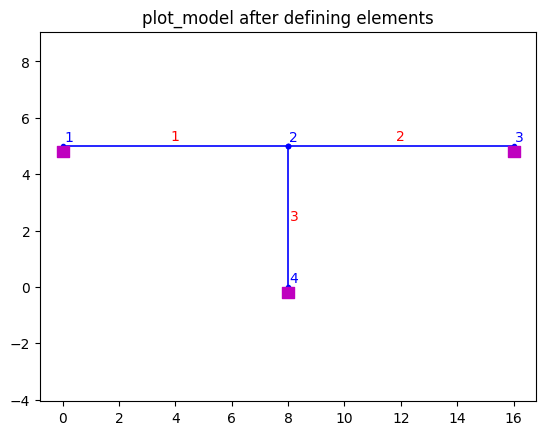

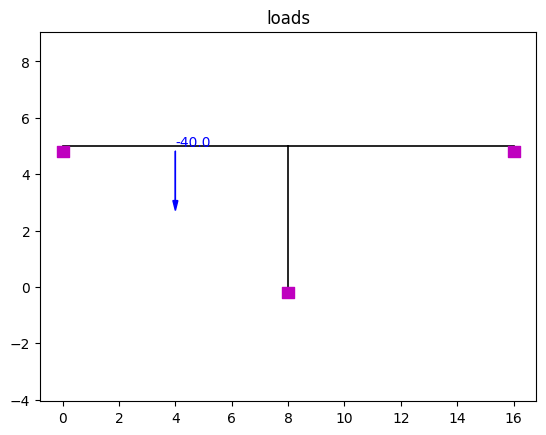

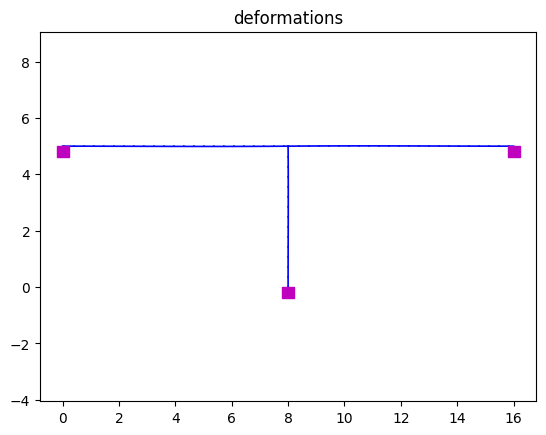

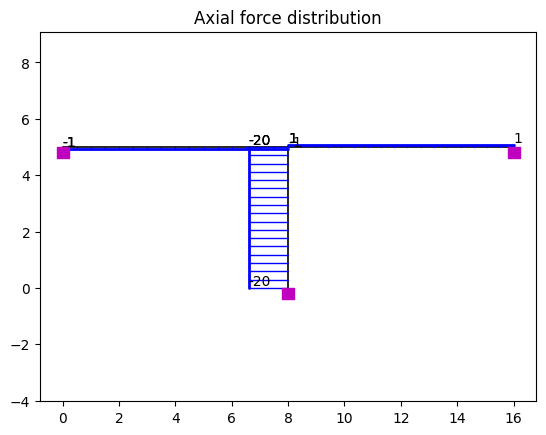

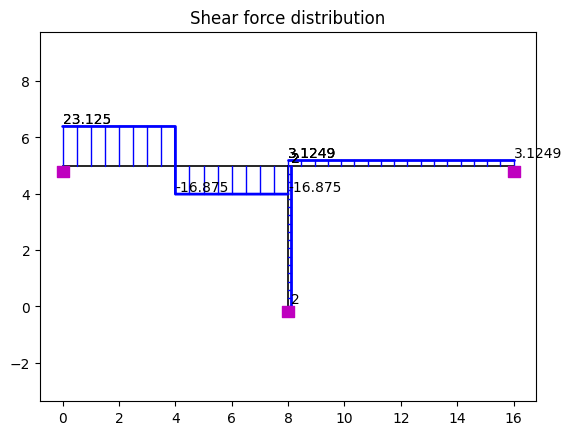

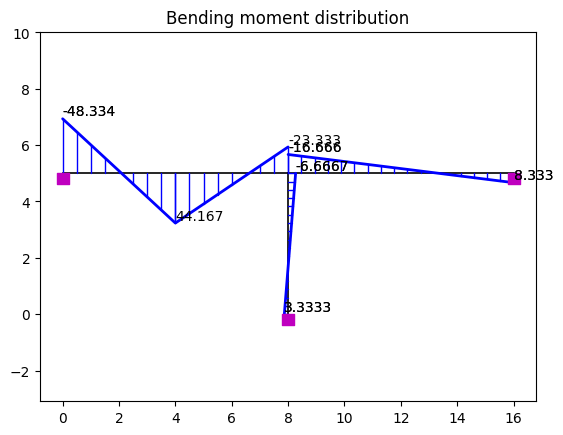

In [22]:
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

A = 100000.

ops.node(1, 0., L2)
ops.node(2, L1, L2)
ops.node(3, 2*L1, L2)
ops.node(4, L1, 0)

ops.fix(1, 1, 1, 1)
ops.fix(2, 0, 0, 0)
ops.fix(3, 1, 1, 1)
ops.fix(4, 1, 1, 1)

# opsv.plot_model()
# plt.title('plot_model before defining elements')

ops.geomTransf('Linear', 1)

# elements
ops.element('elasticBeamColumn', 1, 1, 2, A, E, 4*I, 1)
ops.element('elasticBeamColumn', 2, 2, 3, A, E, 4*I, 1)
ops.element('elasticBeamColumn', 3, 2, 4, A, E, I, 1)


# loads
ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)

ops.eleLoad('-ele', 1, '-type', '-beamPoint', -F_load, 0.5)



# analysis
ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')
ops.analyze(1)

# results
# ops.printModel()
opsv.plot_model()
plt.title('plot_model after defining elements')

opsv.plot_loads_2d()
plt.title('loads')

sfac = 10.
opsv.plot_defo(sfac)
plt.title('deformations')

sfacN, sfacV, sfacM = 7.e-2, 6.e-2, 4.e-2
opsv.section_force_diagram_2d('N', sfacN)
plt.title('Axial force distribution')

opsv.section_force_diagram_2d('T', sfacV)
plt.title('Shear force distribution')

opsv.section_force_diagram_2d('M', sfacM)
plt.title('Bending moment distribution')


plt.show()

In [23]:
# U1, U2, U3, U4, U5, U6, U7, U8, U9 = sym.symbols('U1 U2 U3 U4 U5 U6 U7 U8 U9')
# P1, P2, P3, P4, P5, P6, P7, P8, P9 = sym.symbols('P1 P2 P3 P4 P5 P6 P7 P8 P9')
# R1, R2, R3, R4, R5, R6, R7, R8, R9 = sym.symbols('R1 R2 R3 R4 R5 R6 R7 R8 R9')

In [24]:
# U = Matrix([[U1], [U2], [U3], [U4], [U5], [U6], [U7], [U8], [U9]])
# U

In [25]:
# U.subs(U1, 0).subs(U2, 0).subs(U3, 0).subs(U4, 0).subs(U6, 0).subs(U7, 0).subs(U8, 0).subs(U9, 0)

In [26]:
# P = Matrix([[P1], [P2], [P3], [P4], [P5], [P6], [P7]])
# P

In [27]:
# R = Matrix([[R1], [R2], [R3], [R4], [R5], [R6], [R7], [R8], [R9]])
# R

In [28]:
# R.subs(R5, 0)